In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Dataset Loading and Cleaning

* Load and explore the dataset:

In [20]:
try:
    # Attempt to load the dataset
    file_path = "shopping_trends.csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except pd.errors.ParserError:
    print(f"Error: Failed to parse the file '{file_path}'. Ensure it is in the correct CSV format.")
    exit()

# Display the first 10 rows
print("Preview of the dataset:")
df.head(10)

Dataset loaded successfully!
Preview of the dataset:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


* Handle missing values:

In [21]:
# Check for missing values
try:
    missing_data = df.isnull().sum()
    print("\nMissing values per column:")
    print(missing_data)

    # Handle missing data (if any)
    if missing_data.any():
        print("\nHandling missing data...")
        # Fill numeric columns with their mean, categorical columns with the mode
        for column in df.columns:
            if df[column].dtype in ["int64", "float64"]:
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                df[column].fillna(df[column].mode()[0], inplace=True)
        print("Missing data handled successfully.")
    else:
        print("No missing data found.")
except Exception as e:
    print(f"Error while handling missing data: {e}")



Missing values per column:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
No missing data found.


From the data description, there are no missing values (Non-Null Count = 3900 for all columns). No cleaning is required for missing data.

## Task 2: Basic Data Analysis

* Compute basic statistics:

In [7]:
#Summary statistics for numerical column
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


* Group by categorical column and compute means:

In [10]:
# Average Purchase Amount by Gender
gender_group = df.groupby("Gender")["Purchase Amount (USD)"].mean()
gender_group

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

### Key finding:

Females have a slightly higher average value (60.25) compared to males (59.54)

In [11]:
# Average Review Rating by Category
category_rating = df.groupby("Category")["Review Rating"].mean()
category_rating

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

### Key Findings:
Footwear has the highest average value:

3.790651, indicating that the metric (e.g., sales, ratings, quantity, etc.) is slightly higher for "Footwear" compared to the other categories.
Clothing has the lowest average value:

3.723143, suggesting it performs slightly below the other categories in this metric.
Accessories and Outerwear are close:

Accessories (3.768629) and Outerwear (3.746914) have similar average values, with Accessories slightly ahead.
The range of averages is narrow:

The difference between the highest (Footwear: 3.790651) and the lowest (Clothing: 3.723143) is 0.0675, suggesting minimal variation across categories.

# Task 3: Data Visualization

- Line Chart: Use frequency of purchases for a time-like trend analysis.

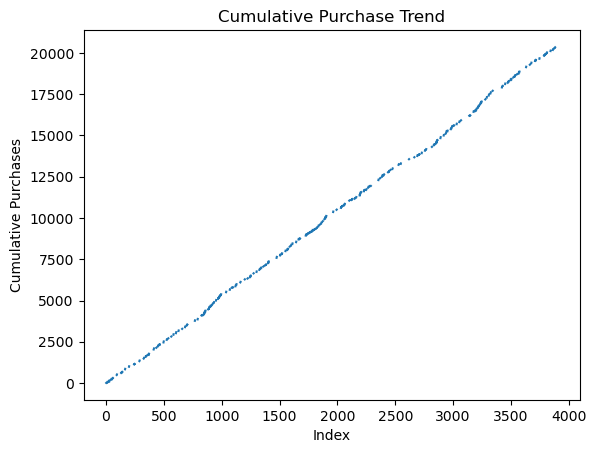

In [12]:
# Assuming "Frequency of Purchases" has values like "Daily", "Weekly", etc.
freq_mapping = {"Daily": 1, "Weekly": 7, "Monthly": 30, "Yearly": 365}
df["Frequency Numeric"] = df["Frequency of Purchases"].map(freq_mapping)

df["Cumulative Purchases"] = df["Frequency Numeric"].cumsum()
plt.plot(df.index, df["Cumulative Purchases"])
plt.title("Cumulative Purchase Trend")
plt.xlabel("Index")
plt.ylabel("Cumulative Purchases")
plt.show()


* Bar chart: Average purchase amount by category.

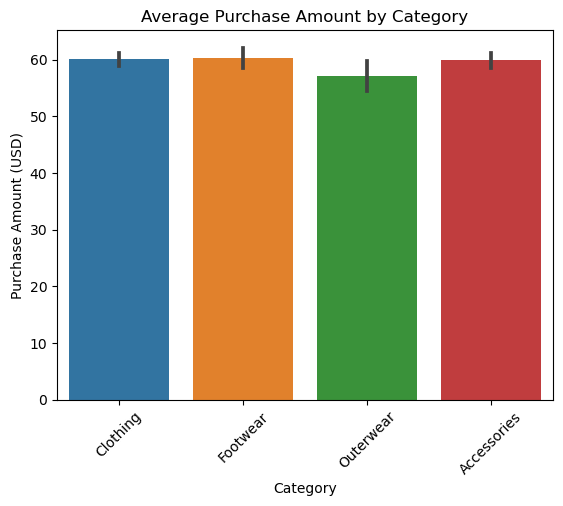

In [13]:
import seaborn as sns

sns.barplot(x="Category", y="Purchase Amount (USD)", data=df)
plt.title("Average Purchase Amount by Category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.show()


* Histogram: Distribution of review ratings.

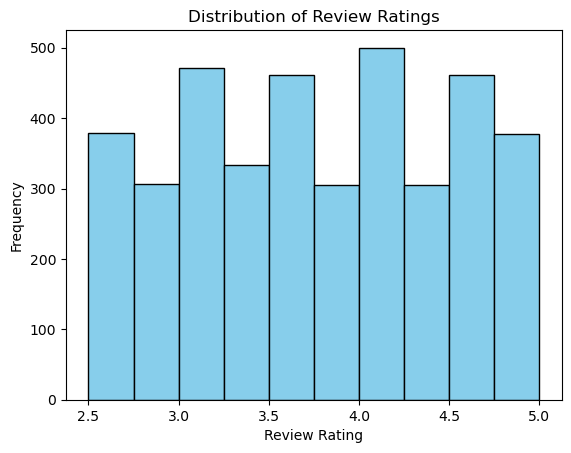

In [15]:
plt.hist(df["Review Rating"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Frequency")
plt.show()


* Scatter plot: Relationship between age and purchase amount.

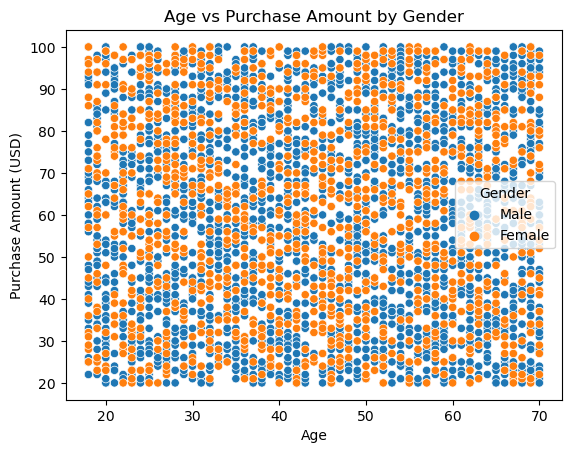

In [16]:
sns.scatterplot(x="Age", y="Purchase Amount (USD)", hue="Gender", data=df)
plt.title("Age vs Purchase Amount by Gender")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.legend(title="Gender")
plt.show()
